# Build Predictive Model for Smoke Detection

**Source of this dataset is in this link : https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset**

**Dataset Info:**
- UTC = Timestamp in Second
- Temperature(C) = Temperature in Celcius
- Humidity(%) = Humidity in %
- TVOC(ppb) = Total Volatile Organic Compound in part per billion
- eCo2(ppm) = Total of Co2 Equivalent Concentration in part per million
- Raw H2 = Total Molecular Hydrogen
- Raw Ethanol = Raw Ethanol Gas
- Pressure = Air Pressure in hectopascal(hPa), 1hPa = 100 Pa
- PM1.0 = Particular Matter diameter Size < 1μm
- PM2.5 = Particular Matter diameter Size < 2.5 μm
- NC0.5 = Number Concentration of particular matter Size < 0.5 μm
- NC1.0 = Number Concentration of particular matter Size < 1 μm
- NC2.5 = Number Concentration of particular matter < 2.5 μm
- CNT = Sample Counter
- Fire Alarm = Binary Output(1 if alarm ring, 0 if not)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

### Data Preprocessing 

In [2]:
df = pd.read_csv("smoke_detection_iot.csv",index_col=0)
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


In [4]:
df.isna().sum()
#There is no null value in every attribute

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [5]:
df.duplicated().sum()
#There is no duplicate data in this dataset

0

In [6]:
df.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [7]:
#Eliminate CNT and UTC, because it only shows counter of sample and timestamp respectively
df.drop(['UTC','CNT'],axis = 1,inplace=True)

### Exploratory Data Analysis

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

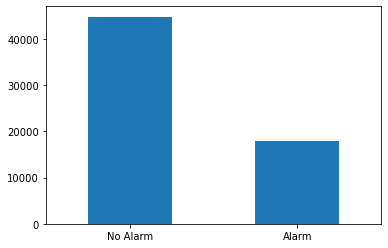

In [8]:
#Analyse The Target Variable, which is fire alarm
df["Fire Alarm"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.xticks(rotation=0)

Terlihat bahwa kita sudah memiliki dataset yang baik, sebab data yang memperlihatkan bahwa fire alarm berbunyi lebih banyak dari yang tidak berbunyi, sehingga model kami dapat memprediksi apakah sebuah fire alarm berbunyi dengan baik

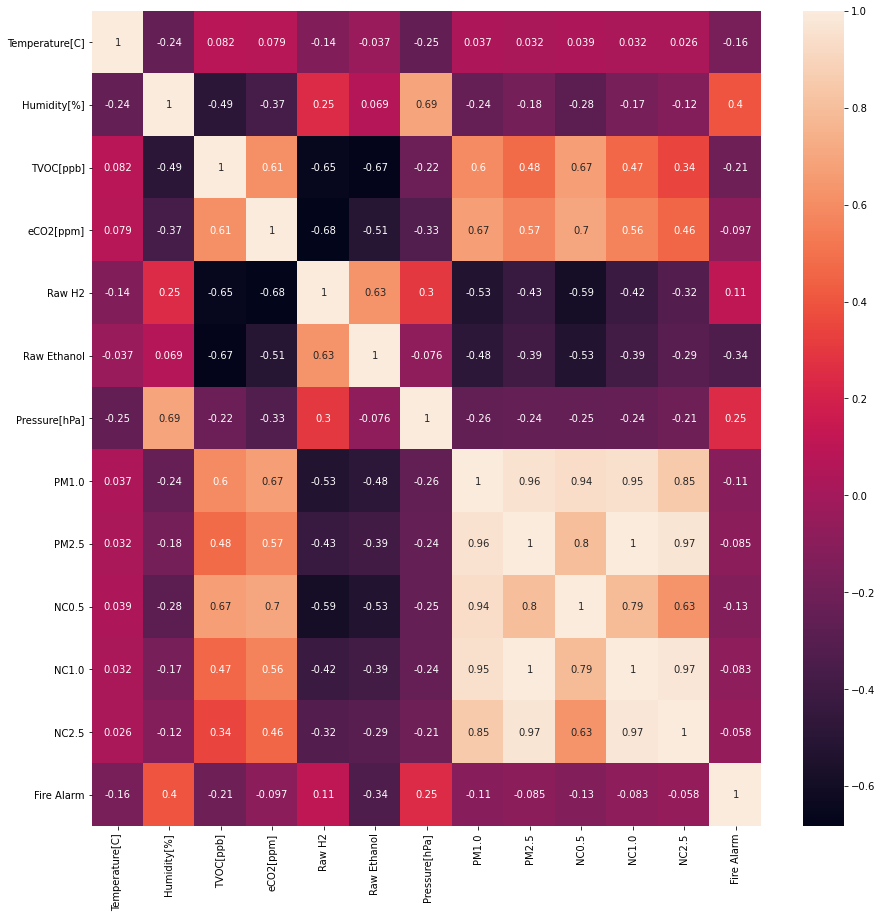

In [9]:
#Plotting correlation matrix heatmap

corr = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

Terlihat bahwa terdapat multicollinnearity yang kuat pada PM1.0 , PM2.5 , NC0.5, NC1.0, dan NC 2.5. Untuk percobaan pertama, kami tidak ingin menghapus terlebih dahulu variabel yang multicollinear untuk melihat performa model secara raw.

# Feature engineering

In [10]:
sc = StandardScaler()

X = df.drop(['Fire Alarm'],axis=1)
Y = df['Fire Alarm']

X = sc.fit_transform(X)

In [11]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(50104, 12)
(12526, 12)
(50104,)
(12526,)


### DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(X_train,Y_train)

dt_pred = dt.predict(X_test)

In [14]:
print(classification_report(Y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



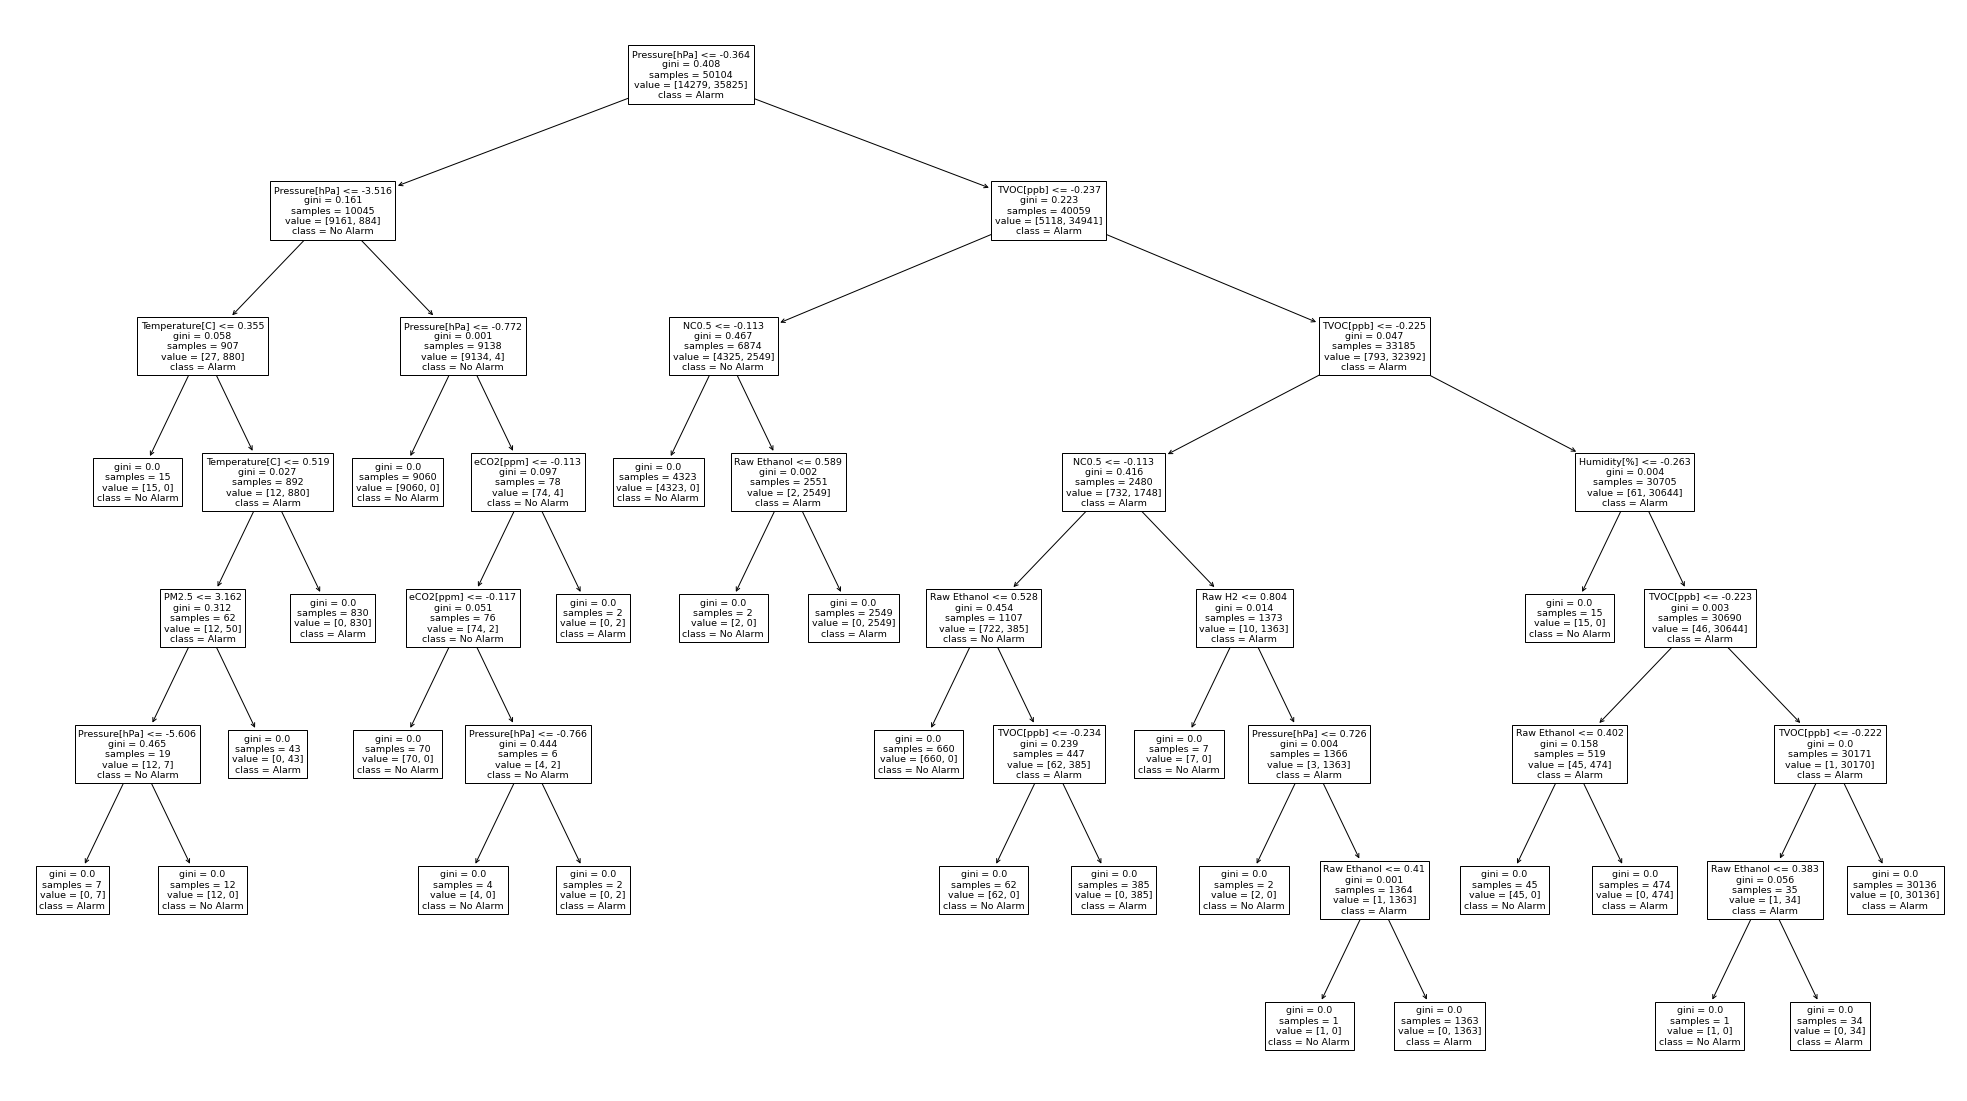

In [15]:
plt.figure(figsize=(35,20))
dtree_viz = plot_tree(dt_model, 
                      feature_names = df.drop(['Fire Alarm'],axis=1).columns,
                      class_names =['No Alarm','Alarm'])

plt.savefig('Model_dt.png')

### XGBClassifier

In [16]:
xgb = XGBClassifier()

xgb.fit(X_train,Y_train)

xgb_pred = xgb.predict(X_test)

In [17]:
print(classification_report(Y_test,xgb_pred))
print(confusion_matrix(Y_test,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

[[3593    1]
 [   0 8932]]
